In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
from nltk.corpus import stopwords

# Naive Bayes to classify review messages

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

# My feature engineering process

I build three different kinds of features:
1. Features= Words that appeared to me as characteristic for negative reviews.
2. Features = Words that appeared most common in the review when stopwords were removed.
3. Both feature lists combined, but duplicates removed.

# My conclusions

None of the approaches gives a great result.
Comparing the data driven approach  (2) to the handpicked list (1), the handpicked list performed better on the training and on the test datasets. The best results were achieved when the data driven list and the hanpicked list were combined. The reason for this probably is that the handpicked list added relevant stopwords back into the list that previously had been removed.

But still even with the combination of two lists, the model only predicts ~1200/1500 correctly.

In [2]:
#Clean input data function
def clean_data(data):
    data = data.dropna()
    
    # to remove punctuation we need a translator
    translator = str.maketrans('', '', string.punctuation)
    data.message = data.message.str.translate(translator)# Remove punctuation
    data.message = data.message.str.lower()
    data.message = data.message.str.rstrip()
    data.message = data.message.str.lstrip()
    data.review = data.review.astype(int)
    
    return data

In [34]:
def extract_keywords(MessageColumn):
    Allword_list = np.array(MessageColumn).tolist()
    Allwords= list(str(x[0]) for x in Allword_list)

    SingleWordlistCleaned = []
    for z in Allwords:
        for word in z.split(' '):
            if word not in stopwords.words('english'):
                SingleWordlistCleaned.append(word)
            
    #print(SingleWordlistCleaned)    
    
    SingleWordlistCleanedCount=Counter(SingleWordlistCleaned)
    SWC_df = pd.DataFrame.from_dict(SingleWordlistCleanedCount, orient='index')
    SWC_df = SWC_df.rename(columns={SWC_df.columns[0]: "WordCount"})
    SWC_df.sorted = SWC_df.sort_values(by=['WordCount'], ascending= False)
    
    return SWC_df.sorted

In [35]:
# Generate the model
   
def NaiveBayes_NB(data,kw):
    kw = np.array(kw).tolist()
    for key in kw:
        # Note that we add spaces around the key so that we're getting the word,
        # not just pattern matching.
        data[str(key)] = data.message.str.contains(
            str(key) + ' ',
            case=False
        )
    print(sns.heatmap(data.corr()))
    
    dat = data[kw]
    target = data['review']
    
    # Our data is binary / boolean, so we're importing the Bernoulli classifier.
    from sklearn.naive_bayes import BernoulliNB

    # Instantiate our model and store it in a new variable.
    bnb = BernoulliNB()

    # Fit our model to the data.
    bnb.fit(dat, target)

    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(dat)

    # Display our results.
    print("Number of mislabeled points out of a total {} points : {}".format(
        dat.shape[0],
        (target != y_pred).sum()
    ))
    
    #Combine rawdata with prediction
    data['PredRes']=y_pred
   
    return data

In [45]:
#Generate different types of word lists
#Word list by hand from just reading some bad reviews
keywordsbyhand = ['not','didn\'t','just','worst','ever','long','waited','poor','cheap','never','sucks','took','least',
            'angry','horrible','bad','slow','waste', 'service','waitress','disappointing','smelled','although','overpriced',
              'avoid']
# Data driven key word list
yelpdata = pd.read_csv('yelp_labelled.csv', header=None)
yelpdata.columns = ['message', 'review']
yelpdata = clean_data(yelpdata)

NegReviews=yelpdata[yelpdata['review']==0]

YelpWords=extract_keywords(NegReviews)
YelpWords['Words']= YelpWords.index

datadrivenkeys = YelpWords.Words[0:50].tolist()

#print(datadrivenkeys)

# Combination of both
Bothlists = list(set(keywordsbyhand + datadrivenkeys)) # set() removes dupliccates
print(Bothlists)

['', 'got', 'like', 'think', 'slow', 'better', 'avoid', 'just', 'wasnt', "didn't", 'not', 'going', 'another', 'poor', 'waitress', 'disappointing', 'place', 'one', 'came', 'never', 'way', 'much', 'ordered', 'cheap', 'probably', 'long', 'bland', 'didnt', 'although', 'even', 'service', 'also', 'time', 'wont', 'well', 'rude', 'ever', 'eat', 'get', 'dont', 'really', 'took', 'worst', 'overpriced', 'terrible', 'times', 'bad', 'minutes', 'horrible', 'waste', 'food', 'disappointed', 'go', 'restaurant', 'us', 'good', 'ive', 'flavor', 'sucks', 'would', 'smelled', 'im', 'angry', 'waited', 'least', 'back', 'wait']


C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  app.launch_new_instance()


AxesSubplot(0.125,0.125;0.62x0.755)
Number of mislabeled points out of a total 1000 points : 427


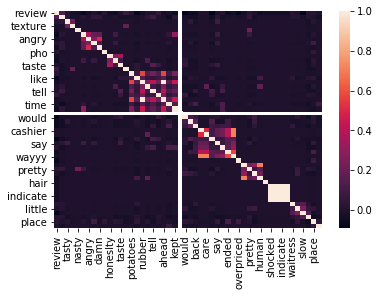

In [6]:
datadrivenResult=NaiveBayes_NB(yelpdata,datadrivenkeys)

AxesSubplot(0.125,0.125;0.62x0.755)
Number of mislabeled points out of a total 1000 points : 341


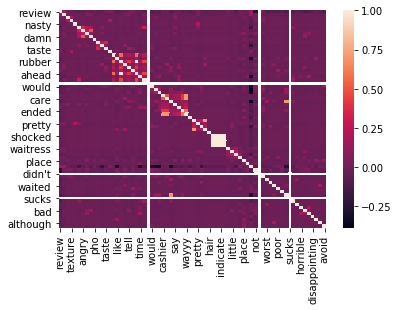

In [7]:
ResultByHand=NaiveBayes_NB(yelpdata,keywordsbyhand)

AxesSubplot(0.125,0.125;0.62x0.755)
Number of mislabeled points out of a total 1000 points : 268


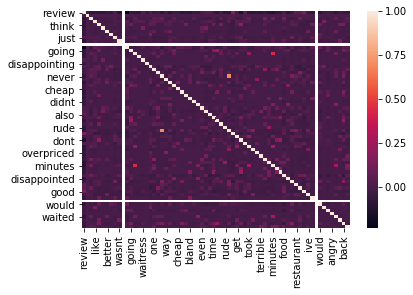

In [46]:
ResultByHand=NaiveBayes_NB(yelpdata,Bothlists)

### Testing the model on other data

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


AxesSubplot(0.125,0.125;0.62x0.755)
Number of mislabeled points out of a total 994 points : 436


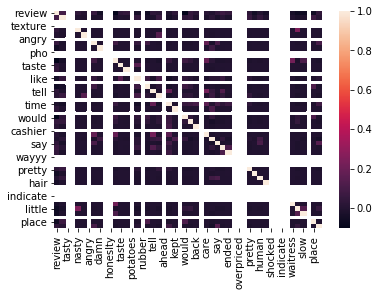

In [8]:
# Run model on imdb data
imdbdata = pd.read_csv('imdb_labelled.csv')
imdbdata.columns = ['message', 'review']
imdbdata = clean_data(imdbdata)

datadrivenResultImbd=NaiveBayes_NB(imdbdata,datadrivenkeys)

AxesSubplot(0.125,0.125;0.62x0.755)
Number of mislabeled points out of a total 994 points : 376


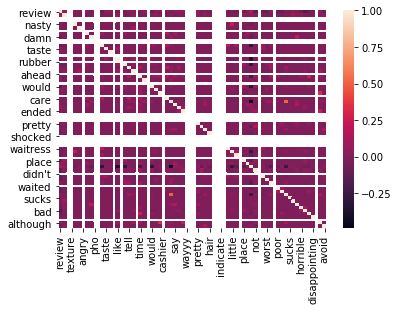

In [9]:
ResultByHandImdb=NaiveBayes_NB(imdbdata,keywordsbyhand)

AxesSubplot(0.125,0.125;0.62x0.755)
Number of mislabeled points out of a total 994 points : 310


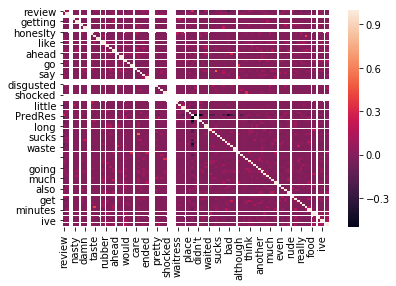

In [48]:
ResultCombiimdbdata=NaiveBayes_NB(imdbdata,Bothlists)

AxesSubplot(0.125,0.125;0.62x0.755)
Number of mislabeled points out of a total 999 points : 434


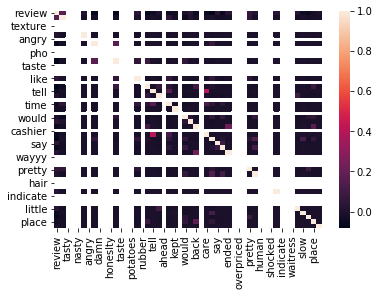

In [10]:
# Run model on amazon data
amazondata = pd.read_csv('amazon_cells_labelled.csv')
amazondata.columns = ['message', 'review']
amazondata = clean_data(amazondata)

datadrivenResultAmazon=NaiveBayes_NB(amazondata,datadrivenkeys)

AxesSubplot(0.125,0.125;0.62x0.755)
Number of mislabeled points out of a total 999 points : 346


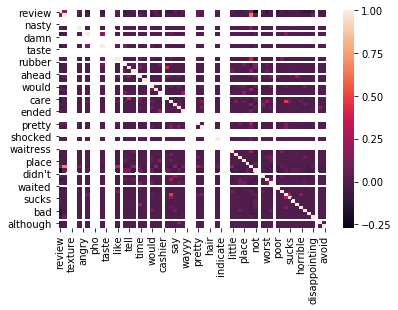

In [11]:
ResultByHandImdb=NaiveBayes_NB(amazondata,keywordsbyhand)

AxesSubplot(0.125,0.125;0.62x0.755)
Number of mislabeled points out of a total 999 points : 303


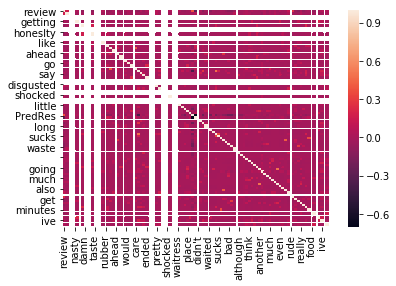

In [49]:
ResultCombiamazondata=NaiveBayes_NB(amazondata,Bothlists)